In [1]:
import Starbucks as sbs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Person as ppl
import Employee as emp

# Run Simulation

In [2]:
#Run simulation
a = sbs.Starbucks()
starbucksArrivalRate = 75
pMobile = 0.31
pCoffee = 0.1
cashRate = 62
barRate = 17.5
simDuration = 3
cTotal = 4
initialCashC = 1
numCashReg = 2
switchRatioCashtoBar = 0.5
switchRatioBartoCash = 1 
meanPatienceTime = 100 
vacationMeanLength = 1


a.simulation(starbucksArrivalRate, 
             pMobile,   
             pCoffee , 
             cashRate, 
             barRate ,     
             simDuration, 
             cTotal, 
             initialCashC, 
             numCashReg,
             switchRatioCashtoBar, 
             switchRatioBartoCash, 
             meanPatienceTime, 
             vacationMeanLength)


# Quick Visual Check

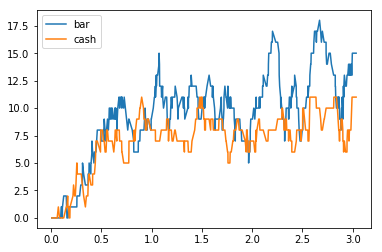

In [3]:
#times
times = a.times
bar_queue = a.barqlength
cash_queue = a.cashqlength
plt.plot(a.times,bar_queue)
plt.plot(times, a.cashqlength)
plt.legend(['bar', 'cash'])

In [4]:
def plot_sbs_queue_length(a):
    plt.figure()
    plt.plot(a.times, a.barqlength, label='bar')
    plt.plot(a.times, a.cashqlength, label='cash')
    plt.xlabel('time (hours)')
    plt.ylabel('number of people in queue')
    plt.show()

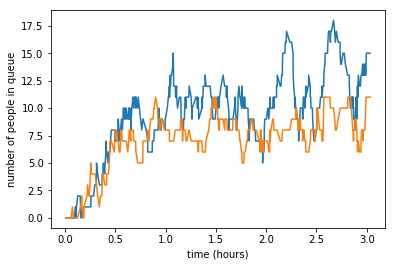

In [5]:
plot_sbs_queue_length(a)

,0
200,6.800
201,6.850
202,6.900
203,6.945
204,6.995
205,7.050
206,7.100
207,7.155
208,7.210
209,7.270


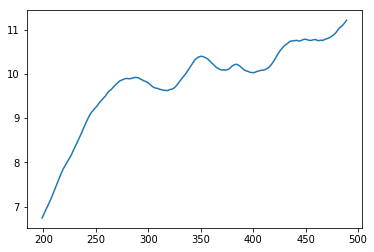

In [6]:
barl = pd.DataFrame(a.barqlength)
barlmean =barl.rolling(window=200).mean()
plt.plot(barlmean)
barlmean[200:400]


# Calculate Time Steady State

In [7]:
# Want to determine when queue lengths settle down 

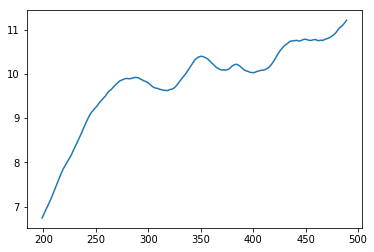

In [8]:
n_ma = 200 # number of points to average over
bar = pd.DataFrame(a.barqlength)
bar_ma =barl.rolling(window=n_ma).mean()
cash = pd.DataFrame(a.cashqlength)
cash_ma =barl.rolling(window=n_ma).mean()
plt.plot(bar_ma)

consecutive_ma_difference_percent =[] #percentage change in moving average

for i in range(n_ma,len(bar_ma)-1):
    consecutive_ma_difference_percent.append(100* (bar_ma.iloc[i+1,0] - bar_ma.iloc[i,0])/ bar_ma.iloc[i,0])

#find when consecutive difference is within threshold of zero for 5 consecutive ma differences
threshold = 0.1 # percentage points 



In [9]:
a = []
number_of_ma_difference_within_threshold= 3
for i in range(len(consecutive_ma_difference_percent)):
    a.append((consecutive_ma_difference_percent[i] < threshold) and consecutive_ma_difference_percent[i] > (-1*threshold))
    
num_of_ma_diff_within_threshold = np.cumsum(a)
#num_of_ma_diff_within_threshold.index(number_of_ma_difference_within_threshold)

#print(num_of_ma_diff_within_threshold[num_of_ma_diff_within_threshold == 3])
num_of_ma_diff_within_threshold.

SyntaxError: invalid syntax (<ipython-input-9-d7e7829a9427>, line 10)

In [ ]:
consecutive_ma_difference_percent[i] <1  i in range(0,100)

In [ ]:
plt.plot(bar)
consecutive_ma_difference_percent

In [ ]:
plt.plot(consecutive_ma_difference_percent)

# Server Graphs

In [10]:
total_occupied_server = []
for i in range(0,len(a.numberOccupiedServersBar)):
    total_occupied_server.append(a.numberOccupiedServersBar[i]+a.numberOccupiedServersCash[i])

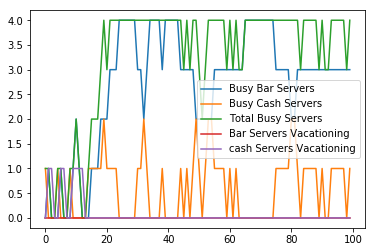

In [11]:
t_begin = 0
t_end = 100
plt.plot(a.numberOccupiedServersBar[t_begin:t_end], label = 'Busy Bar Servers')
plt.plot(a.numberOccupiedServersCash[t_begin:t_end], label = 'Busy Cash Servers')
plt.plot(total_occupied_server[t_begin:t_end], label = 'Total Busy Servers')
plt.plot(a.numberServersOnVacationBar[t_begin:t_end], label = 'Bar Servers Vacationing')
plt.plot(a.numberServersOnVacationCash[t_begin:t_end], label = 'cash Servers Vacationing')
plt.legend()


# Confirm Server Movement

In [12]:
total = []
cashServers = []
barServers = []
for i in range(len(a.numberOccupiedServersCash)):
    
    barServers.append(a.numberOccupiedServersBar[i] +a.numberUnoccupiedServersBar[i] + a.numberServersOnVacationBar[i])
    cashServers.append(a.numberOccupiedServersCash[i] +a.numberUnoccupiedServersCash[i]+a.numberServersOnVacationCash[i])
    total.append(barServers[i] + cashServers[i])

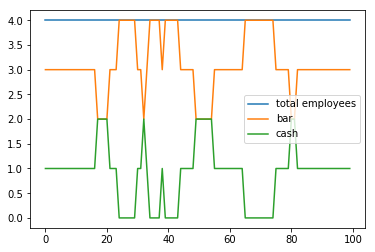

In [13]:
#plt.plot(s[0:100], label = 'all')
plt.plot(total[0:100], label = 'total employees')
plt.plot(barServers[0:100], label = 'bar')
plt.plot(cashServers[0:100], label = 'cash')
plt.legend()

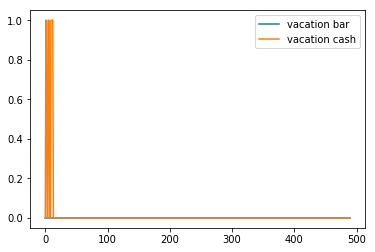

In [14]:
plt.plot(a.numberServersOnVacationBar, label = 'vacation bar')
plt.plot(a.numberServersOnVacationCash, label = 'vacation cash')
plt.legend()

# Server Analysis

In [15]:
def average_server_occupation_percentage(simulation):
   
    total_occupied_server = [] #number of servers busy at each time stamp
    for i in range(0,len(simulation.numberOccupiedServersBar)):
        total_occupied_server.append(simulation.numberOccupiedServersBar[i]+simulation.numberOccupiedServersCash[i])
    
    percent_servers_busy = [] #percent of servers busy at each time stamp
    for i in range(0,len(total_occupied_server)):
        percent_servers_busy.append(total_occupied_server[i]/simulation.cTotal)
    
    average_percentage_occupied = 0 #
    for i in range(1,len(total_occupied_server)):
        average_percentage_occupied += percent_servers_busy[i]*(simulation.times[i]-simulation.times[i-1])
    average_percentage_occupied = average_percentage_occupied/a.times[-1]
    
    return(average_percentage_occupied)
    

In [16]:
average_server_occupation_percentage(a)


0.9035944565025787

In [17]:
simulation = a
total_occupied_server = [] #number of servers busy at each time stamp
for i in range(0,len(simulation.numberOccupiedServersBar)):
    total_occupied_server.append(simulation.numberOccupiedServersBar[i]+simulation.numberOccupiedServersCash[i])
total_occupied_server

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 2,
 2,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,


In [18]:
plt.plot(a.times[100:300],percent_servers_busy[100:300])

NameError: name 'percent_servers_busy' is not defined

# Confirm Proportion of People

In [19]:
all_people = a.allCustomers

In [20]:
c = [p.coffee for p in all_people]
m = [p.mobile for p in all_people]

In [21]:
cum_c = np.cumsum(c) / np.cumsum(np.ones(len(c)))
cum_m = np.cumsum(m) / np.cumsum(np.ones(len(m)))

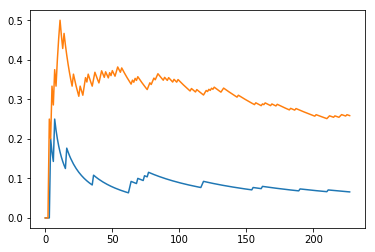

Observed fraction of coffee orders: 0.06578947368421052
Theoretical fraction of coffee orders: 0.06899999999999999
Observed fraction of mobile orders: 0.25877192982456143
Theoretical fraction of mobile orders: 0.31


In [22]:
plt.figure()
plt.plot(cum_c)
plt.plot(cum_m)
plt.show()
print('Observed fraction of coffee orders: {}'.format(np.mean(c)))
print('Theoretical fraction of coffee orders: {}'.format((1 - pMobile) * pCoffee))
print('Observed fraction of mobile orders: {}'.format(np.mean(m)))
print('Theoretical fraction of mobile orders: {}'.format(pMobile))

In [23]:
def confirm_probabilities(a):
    
    people = a.totalcustomers
    c = [p.coffee for p in people]
    m = [p.mobile for p in people]
    
    print('Observed fraction of coffee orders: {}'.format(np.mean(c)))
    print('Theoretical fraction of coffee orders: {}'.format((1 - pMobile) * pCoffee))
    print('Observed fraction of mobile orders: {}'.format(np.mean(m)))
    print('Theoretical fraction of mobile orders: {}'.format(pMobile))

# Average Queue Length

In [24]:
def averageQueueLength(times,queue):
    avg = np.sum(np.subtract(times[1:], times[0:-1])*queue[1:])/times[-1]
    return(avg)

# Average time in Starbucks

In [25]:
def timeInStarbucks(people):
    #time in starbucks if mobile order
    timeInStbksMobile = []
    #time in starbucks if physical order
    timeInStbksPhysical = []
    #time in starbucks if physical Coffee order
    timeInStbksCoffee = []
    for person in people:
        if person.mobile == 1:
            #mobile order
            timeInStbksMobile.append(person.timeExitStbks- person.timeEnterStbks)
        elif person.coffee == 1:
            #physical queue getting coffee
            timeInStbksCoffee.append(person.timeExitStbks- person.timeEnterStbks)
        else:
            #mobile people
            timeInStbksPhysical.append(person.timeExitStbks- person.timeEnterStbks)
    #Average time spent for mobile order
    avgM = np.mean(timeInStbksMobile)
    #average time spent for physical order
    avgP = np.mean(timeInStbksPhysical)
    #average time spent for physical coffee order
    avgC = np.mean(timeInStbksCoffee)
    return [avgM, avgP, avgC]
    

# Average Time in Queue

In [26]:
def timeInQueue(people):
    timeBarQueue = []
    timeCashQueue = []
        
    for person in people:
        # Physical orders
        if person.mobile == 0:
            timeCashQueue.append(person.timeExitCashQ - person.timeEnterCashQ)
            if person.coffee == 0:
                timeBarQueue.append(person.timeExitBarQ - person.timeEnterBarQ)
        else:
            timeBarQueue.append(person.timeExitBarQ - person.timeEnterBarQ)
            
    
    avgC = np.mean(timeCashQueue)
    avgB = np.mean(timeBarQueue)
    
    return [avgC, avgB]

In [27]:
def calcuateMetrics(simulation):
    #input the output of the simulation
    
    #list of times of all events 
    times = simulation.times
    
    #only the customers did not abandon and did not balk
    people = simulation.completedCustomers
    
    #Avg Queue Lengths:
    AvgQLenBar = averageQueueLength(times,simulation.barqlength)
    AvgQLenCash = averageQueueLength(times,simulation.cashqlength)
    
    #Average time in Queue:
    AvgTCash = timeInQueue(people)[0]
    AvgTBar = timeInQueue(people)[1]
    
    #Average time in Stbks:
    AvgTStbksMobile = timeInStarbucks(people)[0]
    AvgTStbksPhysical = timeInStarbucks(people)[1]
    AvgTStbksCoffee = timeInStarbucks(people)[2]
    
    return[AvgTStbksMobile, AvgTStbksPhysical, AvgTStbksCoffee, AvgTCash, AvgTBar, AvgQLenBar, AvgQLenCash]
    

In [28]:
#percentage of people who are mobile orders
p_mobile  = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

names = ['AvgTStbksMobile', 'AvgTStbksPhysical', 'AvgTStbksCoffee', 'AvgTCash', 'AvgTBar', 'AvgQLenBar', 'AvgQLenCash']
results = pd.DataFrame(columns = names)
i = 0 
for p in p_mobile:
    
    s =sbs.Starbucks()
    pMobile = p
    s.simulation(starbucksArrivalRate, 
             pMobile,   
             pCoffee , 
             cashRate, 
             barRate ,     
             simDuration, 
             cTotal, 
             initialRatioC, 
             numCashReg,
             switchRatioCashtoBar, 
             switchRatioBartoCash, 
             meanPatienceTime, 
             vacationMeanLength)
    data = calcuateMetrics(s)
    #new =pd.DataFrame([data], columns = names)
    #results.append(pd.DataFrame([data], columns = names))
    results.loc[i] = data
    
    i = i + 1
    
print(results)

   AvgTStbksMobile  AvgTStbksPhysical  AvgTStbksCoffee  AvgTCash   AvgTBar  \
0         0.270204           0.377426         0.162441  0.130458  0.179282   
1         0.068393           0.112201         0.056937  0.031733  0.031957   
2         0.031417           0.057773         0.032366  0.012299  0.005773   
3         0.201376           0.369895         0.258613  0.167605  0.142522   
4         0.057434           0.087913         0.042066  0.028574  0.020250   
5         0.087417           0.175629         0.067029  0.070920  0.047612   
6         0.226840           0.588880         0.110090  0.375457  0.166689   
7         0.032005           0.055503         0.039643  0.009386  0.005870   
8         0.150901           0.474677              NaN  0.346748  0.097693   

   AvgQLenBar  AvgQLenCash  
0    8.529295     6.788382  
1    1.878022     1.572196  
2    0.461663     0.672222  
3    8.875336     6.774844  
4    1.397158     1.001253  
5    3.323568     2.012809  
6   10.810436   

/home/malfrine/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/malfrine/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Plot 

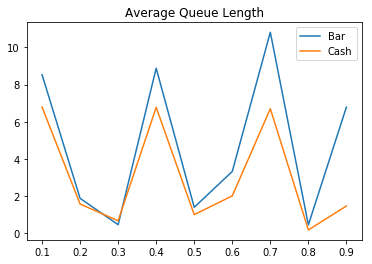

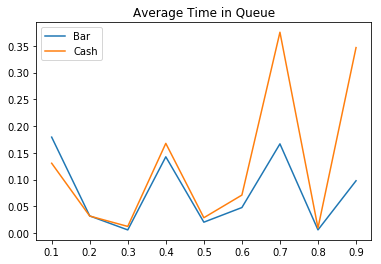

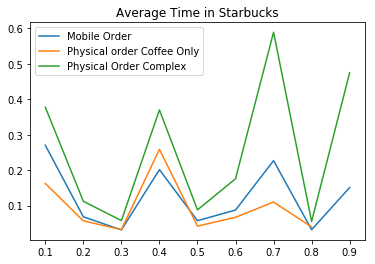

In [29]:
plt.figure(1)
plt.plot(p_mobile, results.AvgQLenBar, label = 'Bar')
plt.plot(p_mobile, results.AvgQLenCash, label = 'Cash')
plt.legend()
plt.title('Average Queue Length')
plt.show()

plt.figure(2)
plt.plot(p_mobile, results.AvgTBar, label = 'Bar')
plt.plot(p_mobile, results.AvgTCash, label = 'Cash')
plt.legend()
plt.title('Average Time in Queue')
plt.show()

plt.figure(3)
plt.plot(p_mobile, results.AvgTStbksMobile, label = 'Mobile Order')
plt.plot(p_mobile, results.AvgTStbksCoffee, label = 'Physical order Coffee Only')
plt.plot(p_mobile, results.AvgTStbksPhysical, label = 'Physical Order Complex')
plt.legend()
plt.title('Average Time in Starbucks')
plt.show()

# Stability Analysis

1. $\lambda_{in} = \lambda_{out}$
2. $\lambda_{in} < \mu \cdot n_{servers}$

### Cashier Queue Stability:
$$ (1 - p_m) \cdot \lambda < \mu_c \cdot n_c $$

Minimum number of cahsiers:
$$ n_c > \frac{(1 - p_m) \cdot \lambda}{\mu_c} $$

### Bar Queue Stability:
$$ (1 - p_m) \cdot (1 - p_c) \cdot \lambda + p_m \cdot \lambda < \mu_b \cdot n_b$$
$$ (1 - p_m -  p_c \cdot (1 - p_m) + p_m) \cdot \lambda < \mu_b \cdot n_b$$
$$ (1 - p_c \cdot (1 - p_m) ) \cdot \lambda < \mu_b \cdot n_b$$

Minimum number of baristas:
$$ n_b > \frac{\lambda \cdot (1 - p_c + p_c \cdot p_m )}{\mu_b}$$

In [30]:
isCashStable = a.cCash > (1 - a.pMobile) * a.starbucksArrivalRate / a.cashRate

In [31]:
isBarStable = a.cBar > a.starbucksArrivalRate * (1 - a.pCoffee + a.pCoffee * a.pMobile) / a.barRate

In [32]:
def calcMinCashServers(pMobile, arrivalRate, cashRate):
    return np.ceil((1 - pMobile) * arrivalRate / cashRate)

def calcMinBarServers(pMobile, pCoffee, arrivalRate, barRate):
    return np.ceil(arrivalRate * (1 - pCoffee + pCoffee * pMobile) / barRate)

def calcMinServers(pMobile, pCoffee, arrivalRate, barRate, cashRate):
    minCashServers = calcMinCashServers(pMobile, arrivalRate, cashRate)
    minBarServers = calcMinBarServers(pMobile, pCoffee, arrivalRate, barRate)
    return minCashServers, minBarServers

In [33]:
def calcIsCashStable(a):
    return a.cCash > calcMinCashServers(a.pMobile, a.starbucksArrivalRate, a.cashRate)

def calcIsBarStable(a):
    return a.cBar > calcMinBarServers(a.pMobile, a.pCoffee, a.starbucksArrivalRate, a.barRate)

def calcIsStarbucksStable(a):
    return calcIsCashStable(a) and calcIsBarStable(a)

In [34]:
print(calcIsCashStable(a))
print(calcIsBarStable(a))
print(calcIsStarbucksStable(a))

False
False
False
